# USE-CASE


Pima Indians Diabetes Dataset is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

```
Number of times pregnant.
Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
Diastolic blood pressure (mm Hg).
Triceps skinfold thickness (mm).
2-Hour serum insulin (mu U/ml).
Body mass index (weight in kg/(height in m)^2).
Diabetes pedigree function.
Age (years).
Class variable (0 or 1).
```




## **IMPORT LIBRARIES**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **IMPORT DATA AND GET INFORMATION**

In [0]:
data = pd.read_csv('pima-indians-diabetes.csv', names=['Pregnancies','Glucose','BP','SkinThickness',
                  'Insulin','BMI','Pedigree','Age','Diabetic'])
data.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
data.shape

(768, 9)

In [0]:
data.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BP             768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Diabetic       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Identifying the type of the data

```
 0   Pregnancies    768 non-null    int64    ---> Numeric (Discrete)
 1   Glucose        768 non-null    int64    ---> Numeric (Continuous)
 2   BP             768 non-null    int64    ---> Numeric (Continuous)
 3   SkinThickness  768 non-null    int64    ---> Numeric (Continuous)
 4   Insulin        768 non-null    int64    ---> Numeric (Continuous)
 5   BMI            768 non-null    float64  ---> Numeric (Continuous)
 6   Pedigree       768 non-null    float64  ---> Numeric (Continuous)
 7   Age            768 non-null    int64    ---> Numeric (Continuous)
 8   Diabetic       768 non-null    int64  
```



## **DATA VISUALIZATION**

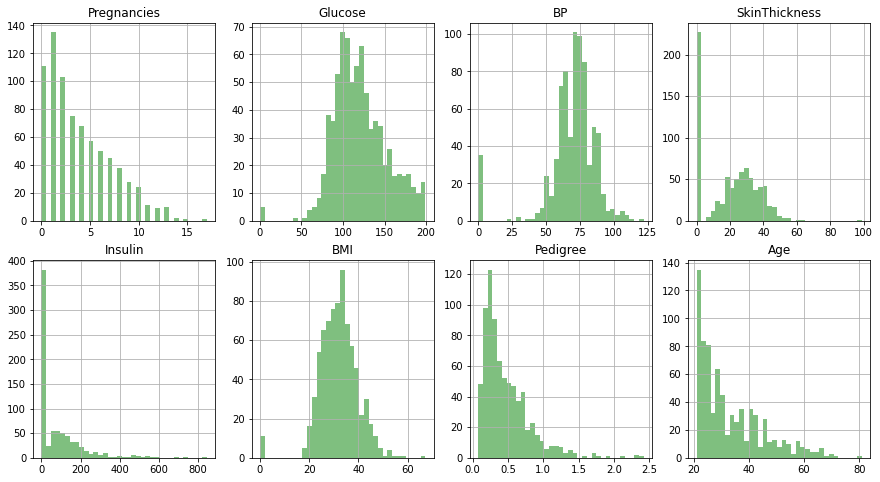

In [0]:
features = ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']

ROWS, COLS = 2,4
fig, ax = plt.subplots(ROWS, COLS, figsize=(15,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    #sns.distplot(data[features],bins=5,ax=ax[row,col]).set_title(feature)
    data[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)
  

**Analysis:** We can see that because of imputed value 0, we might have in accurate predictions especially because of features like Glucose, BP, SkinThickness, Insulin and BMI. Hence, the data needs to be preprocessed

## **DATA PREPROCESSING**

 3. Check and remove all duplicate columns from the Dataframe.  **NA**
 5. Categorical Data - **NA**
 6. Ordinal Data     - **NA**
 7. DateTime Data    - **NA**

### Check and remove all duplicate records from dataframe

In [0]:
data.duplicated().any()

False

### If your data is continous numerical data, check with reference to domain whether the following parameters are valid or not:
  1. Negative Numbers are allowed or not.
  2. Positive Numbers are allowed or not.
  3. Complex Numbers are allowed or not.
  4. Decimals are allowed or just integers are expected

In [0]:
def check_negative(data=data,column = features):
  for column in features:
    if(data[column] < 0).any():
      print("Negative value present in: ", column)
    else:
      print("No Negative value present in: ",column)

check_negative()

No Negative value present in:  Pregnancies
No Negative value present in:  Glucose
No Negative value present in:  BP
No Negative value present in:  SkinThickness
No Negative value present in:  Insulin
No Negative value present in:  BMI
No Negative value present in:  Pedigree
No Negative value present in:  Age


### Handling Missing Imputed Values:

In [0]:
feature_fix = ['Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI']

def impute_0_nan_median(data=data,column = feature_fix):
  for column in feature_fix:
    if(data[column] == 0).any():
        data[column].loc[data[column] < 1] = np.nan
        median = data[column].median()
        print(column, "Median value is: ", median)
        data[column] = data[column].fillna(median)
    else:
      print(column, "has no value that is equal to 0")

impute_0_nan_median()

Glucose Median value is:  117.0
BP Median value is:  72.0
SkinThickness Median value is:  29.0
Insulin Median value is:  125.0
BMI Median value is:  32.3


In [0]:
data.head(5)

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Diabetic
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Visualizing the data again to see the distribution of data after replacing 0 with median values

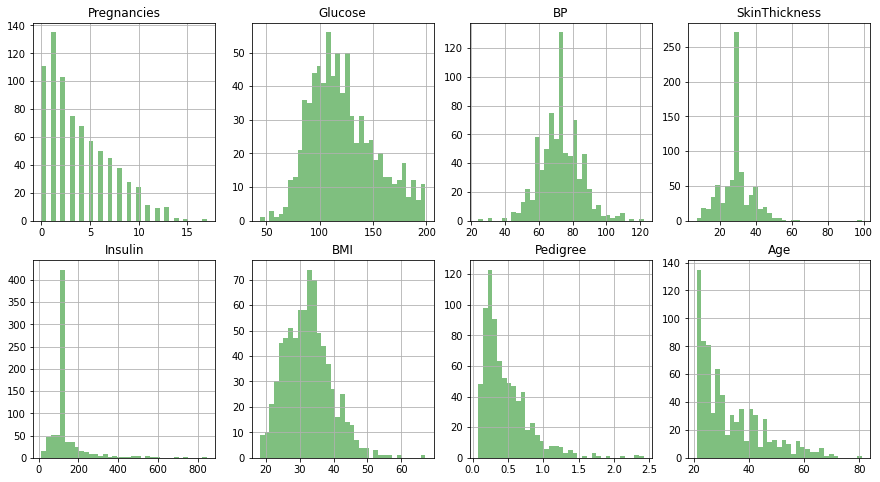

In [0]:
ROWS, COLS = 2,4
fig, ax = plt.subplots(ROWS, COLS, figsize=(15,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    #sns.distplot(data[features],bins=5,ax=ax[row,col]).set_title(feature)
    data[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)
  

### Handling Outliers:

In [0]:
data_outliners = pd.DataFrame()
for columns in features:
  data_outliners[columns] = data[columns]

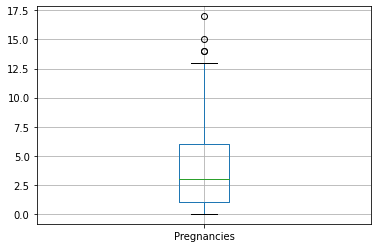

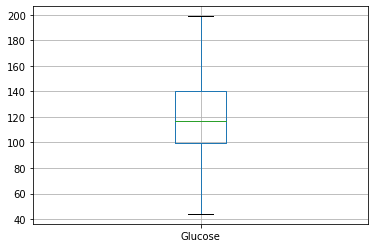

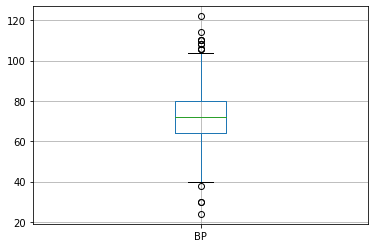

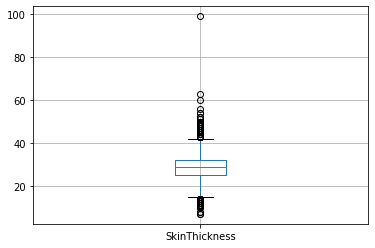

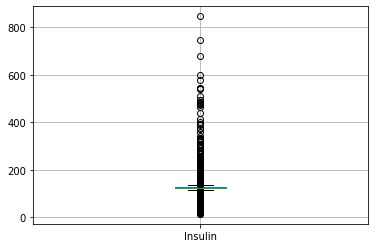

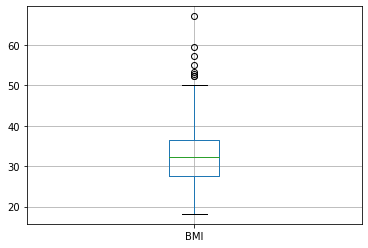

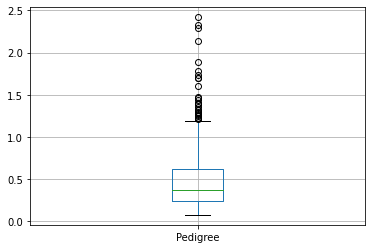

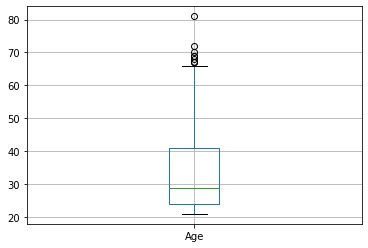

In [0]:
for columns in features:
  plt.figure()
  data_outliners.boxplot([columns])

VERIFY OUTLIERS USING PYTHON CODE

In [0]:
# Defining a function to calculate the lower bound and upper bound and if there exists any outlier
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.nanpercentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 print("Lower bound: ", lower_range, "Upper bound: ", upper_range)
 if ((datacolumn < lower_range).any() or (datacolumn > upper_range).any()):
  outliers = (datacolumn < lower_range).sum() + (datacolumn > upper_range).sum()
  print(outliers, " No of Outliers present: ", "\n")
 else:
  print("No Outliers Detected", "\n")
 return lower_range,upper_range

In [0]:
# Running loop over the Data Frame with Numeric (Continuous) Values
lowerbound = []
upperbound = []
for column in features:
  print("Outlier check for column: ",column)
  lowerbound_column, upperbound_column = outlier_treatment(data[column])
  lowerbound.append(lowerbound_column)
  upperbound.append(upperbound_column)

Outlier check for column:  Pregnancies
Lower bound:  -6.5 Upper bound:  13.5
4  No of Outliers present:  

Outlier check for column:  Glucose
Lower bound:  39.0 Upper bound:  201.0
No Outliers Detected 

Outlier check for column:  BP
Lower bound:  40.0 Upper bound:  104.0
14  No of Outliers present:  

Outlier check for column:  SkinThickness
Lower bound:  14.5 Upper bound:  42.5
87  No of Outliers present:  

Outlier check for column:  Insulin
Lower bound:  112.875 Upper bound:  135.875
346  No of Outliers present:  

Outlier check for column:  BMI
Lower bound:  13.849999999999998 Upper bound:  50.25
8  No of Outliers present:  

Outlier check for column:  Pedigree
Lower bound:  -0.32999999999999996 Upper bound:  1.2
29  No of Outliers present:  

Outlier check for column:  Age
Lower bound:  -1.5 Upper bound:  66.5
9  No of Outliers present:  



In [0]:
#Drop the column with the outliner values
for i,column in enumerate(features):
  if((column == 'Insulin')|(column=='SkinThickness')):
    print("Skipping to drop elements for: ", column)
  else:
   data.drop(data[(data[column] < lowerbound[i]) | (data[column] > upperbound[i])].index, axis=0, inplace=True)

Skipping to drop elements for:  SkinThickness
Skipping to drop elements for:  Insulin


Looking at Outliers, seems Insulin feature can be dropped as it has many Outliers. Holding it as of now to see if it's an important feature, using feature Selection Techniques

In [0]:
data.reset_index(drop=True, inplace=True)

In [0]:
data.shape

(707, 9)

### SEPARATING FEATURES AND LABELS

For Sklearn users:

Rules for Regression:
 1. Features and label must be in the form of numpy array
 2. Features must be in 2d array
 3. Label must be in 1d array

In [0]:
data.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Diabetic
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0


In [0]:
features = data.iloc[:,:-1].values
label = data.iloc[:,8].values

In [0]:
print("Dimension on feature is: ", features.ndim,"\t","Dimension of label: ", label.ndim, "\n")

Dimension on feature is:  2 	 Dimension of label:  1 



## **CHECK BALANCE OR UNBALANCED DATA**

Count of Diabetic and non Diabetic:  
 0    471
1    236
Name: Diabetic, dtype: int64 



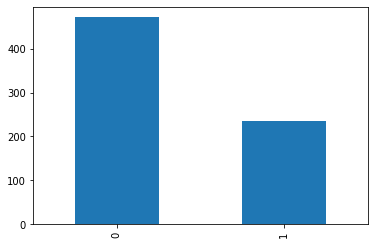

In [0]:
print("Count of Diabetic and non Diabetic: ","\n", data['Diabetic'].value_counts(),"\n")
data.Diabetic.value_counts().plot(kind='bar')

**Analysis:** We can see that the data is unbalanced. There are **471** - **Non Diabetic** patients and **236** - **Diabetic** Patients

## **FEATURE ENGINEERING**

```
Column 0: Pregnancies
Column 1: Glucose
Column 2: BP
Column 3: SkinThickness
Column 4: Insulin
Column 5: BMI
Column 6: Pedigree
Column 7: Age
```



### Method 1. Correlation Analysis

Regression ---> To check the best **Feature** w.r.t **Label**

In [0]:
data.corr()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Diabetic
Pregnancies,1.000000,0.117264,0.189228,0.111943,0.039331,0.025880,0.010595,0.554594,0.220503
Glucose,0.117264,1.000000,0.202953,0.167646,0.426071,0.208059,0.088648,0.291893,0.506852
BP,0.189228,0.202953,1.000000,0.201985,0.026096,0.279169,0.030960,0.335870,0.173087
SkinThickness,0.111943,0.167646,0.201985,1.000000,0.153057,0.536053,0.067144,0.156511,0.198625
Insulin,0.039331,0.426071,0.026096,0.153057,1.000000,0.179442,0.092467,0.139810,0.233668
BMI,0.025880,0.208059,0.279169,0.536053,0.179442,1.000000,0.144804,0.059426,0.283426
Pedigree,0.010595,0.088648,0.030960,0.067144,0.092467,0.144804,1.000000,0.047079,0.174069
Age,0.554594,0.291893,0.335870,0.156511,0.139810,0.059426,0.047079,1.000000,0.277861
Diabetic,0.220503,0.506852,0.173087,0.198625,0.233668,0.283426,0.174069,0.277861,1.000000


Rule:

 Select those features who have corr val greater than 50% (0.5)

 Features Selected: **Glucose**

 Features Eliminated: **Pregnencies, BP, SkinThickness, Insulin, BMI, Pedigree, Age**

### Method 3: RFE (Recursive Feature Elimination ) Technique

STEPS to be followed:
 1. Initialize the model algorithm
 2. Apply RFE to model (ALL FEATURES AND LABEL)
 3. Get Features with High Ranking (1,2,3,4,...) (Get features that has Rank 1. Sometimes Rank 2 is considered)

In [0]:
# 1. Initialize the model algorithm
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()

# 2. Apply RFE to model (ALL FEATURES AND LABEL)
from sklearn.feature_selection import RFE
selectFeaturesFromRFE = RFE(estimator=modelLR,
                           step=1) 

# Fit the data with RFE
selectFeaturesFromRFE.fit(features,label)

# 3. Get Features with High Ranking (1,2,3,4,...) (Get features that has Rank 1. Sometimes Rank 2 is considered)
print(selectFeaturesFromRFE.ranking_)

[1 1 3 4 5 1 1 2]


Features selected: **Pregnancies, Glucose, BMI, Pedigree**

Features not Selected : **BP, SkinThickness, Insulin, Age**

### Method 4: Select From Model

Steps to apply SBM (All Model algo will work)
 1. Initialize the model algorithm
 2. Apply RFE to model (ALL FEATURES AND LABEL)
 3. Get Features with High Support (True/False) 

In [0]:
# 1. Initialize the model algorithm
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()

# 2. Apply SBM to model (ALL FEATURES AND LABEL)
from sklearn.feature_selection import SelectFromModel
selectFeaturesFromSFM = SelectFromModel(modelLR)

# Fit the data with SFM
selectFeaturesFromSFM.fit(features,label)

# 3. Get Features with True value
print(selectFeaturesFromSFM.get_support())

[False False False False False False  True False]


**Analysis:** Select **Pedigree** as finalFeatures

### Method 5: ANOVA

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
formula = 'Diabetic ~ C(Glucose) + C(BP) + C(BMI) + C(Insulin)+ C(SkinThickness) + C(Age) + C(Pregnancies)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Glucose),27.612163,133.0,1.745326,0.014364
C(BP),6.178438,36.0,1.442793,0.116919
C(BMI),38.428995,231.0,1.398540,0.082551
C(Insulin),28.344621,173.0,1.377376,0.097117
C(SkinThickness),7.621164,47.0,1.363174,0.144241
C(Age),7.297137,45.0,1.363226,0.146154
C(Pregnancies),1.734205,13.0,1.121463,0.365215
Residual,5.709702,48.0,NaN,NaN


Selected features: **Glucose, BP, BMI, Insulin, SkinThickness, Age**

## **OUTPUTS - FEATURE ENGINEERING**

### Find Accuracies

In [0]:
#Corelation Analysis
feature_featureEngg = features[:,[1]]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

for i in range(1,700):
    X_train,X_test,y_train,y_test = train_test_split(feature_featureEngg, label, test_size=0.2, random_state = i)
    model1 = LogisticRegression()
    model1.fit(X_train,y_train)
    
    train_score = model1.score(X_train,y_train)
    test_score = model1.score(X_test,y_test)
    
    if (test_score > train_score) & (test_score>0.83):
        print("Test: {} , Train: {} , RS : {}".format(test_score,train_score,i))

Test: 0.8380281690140845 , Train: 0.7327433628318584 , RS : 151
Test: 0.8309859154929577 , Train: 0.7345132743362832 , RS : 526
Test: 0.8380281690140845 , Train: 0.7345132743362832 , RS : 583


In [0]:
#RFE
feature_featureEngg = features[:,[0,1,5,6]]

for i in range(1,700):
    X_train,X_test,y_train,y_test = train_test_split(feature_featureEngg, label, test_size=0.2, random_state = i)
    model1 = LogisticRegression()
    model1.fit(X_train,y_train)
    
    train_score = model1.score(X_train,y_train)
    test_score = model1.score(X_test,y_test)
    
    if (test_score > train_score) & (test_score>0.84):
        print("Test: {} , Train: {} , RS : {}".format(test_score,train_score,i))

Test: 0.8450704225352113 , Train: 0.7592920353982301 , RS : 14
Test: 0.8661971830985915 , Train: 0.7522123893805309 , RS : 340
Test: 0.8450704225352113 , Train: 0.7610619469026548 , RS : 341
Test: 0.852112676056338 , Train: 0.7592920353982301 , RS : 577
Test: 0.8661971830985915 , Train: 0.7610619469026548 , RS : 583
Test: 0.852112676056338 , Train: 0.7610619469026548 , RS : 611


In [0]:
#SFM
feature_featureEngg = features[:,[6]]

for i in range(1,700):
    X_train,X_test,y_train,y_test = train_test_split(feature_featureEngg, label, test_size=0.2, random_state = i)
    model1 = LogisticRegression()
    model1.fit(X_train,y_train)
    
    train_score = model1.score(X_train,y_train)
    test_score = model1.score(X_test,y_test)
    
    if (test_score > train_score) & (test_score>0.75):
        print("Test: {} , Train: {} , RS : {}".format(test_score,train_score,i))

Test: 0.7605633802816901 , Train: 0.6442477876106195 , RS : 51
Test: 0.7535211267605634 , Train: 0.6442477876106195 , RS : 306
Test: 0.7535211267605634 , Train: 0.647787610619469 , RS : 467
Test: 0.7605633802816901 , Train: 0.6460176991150443 , RS : 583
Test: 0.7746478873239436 , Train: 0.6407079646017699 , RS : 650


In [0]:
#All features
feature_featureEngg = features[:,:]

for i in range(1,700):
    X_train,X_test,y_train,y_test = train_test_split(feature_featureEngg, label, test_size=0.2, random_state = i)
    model1 = LogisticRegression()
    model1.fit(X_train,y_train)
    
    train_score = model1.score(X_train,y_train)
    test_score = model1.score(X_test,y_test)
    
    if (test_score > train_score) & (test_score>0.85):
        print("Test: {} , Train: {} , RS : {}".format(test_score,train_score,i))

Test: 0.852112676056338 , Train: 0.7557522123893805 , RS : 14
Test: 0.852112676056338 , Train: 0.768141592920354 , RS : 371
Test: 0.8591549295774648 , Train: 0.7663716814159292 , RS : 583


### Comparision Table

In [0]:
ComparisionTable = pd.DataFrame({"Method":["CORR", "RFE", "SFM", "All features"], "Accuracy":
                              [83.8, 86.0, 76.0, 85.6], "Random State":[583, 583, 583, 583]})
ComparisionTable.sort_values(by="Accuracy", ascending=False)

,Method,Accuracy,Random State
1,RFE,86.0,583
3,All features,85.6,583
0,CORR,83.8,583
2,SFM,76.0,583


## **ML MODEL CREATION**

 Rules for Classification (From Sklearn)
 1. Data must be complete
 2. Data must be strictly numeric
 3. Features must be in the form of 2d numpy array
 4. Label must be in the form of 1d numpy ar

### **Check the Random seed for which better score is achieved**

In [0]:
feature_featureEngg =  features[:,[0,1,5,6,7]]

for i in range(1,800):
    X_train,X_test,y_train,y_test = train_test_split(feature_featureEngg, label, test_size=0.2, random_state = i)
    model1 = LogisticRegression()
    model1.fit(X_train,y_train)
    
    train_score = model1.score(X_train,y_train)
    test_score = model1.score(X_test,y_test)
    
    if (test_score > train_score) & (test_score>0.88):
        print("Test: {} , Train: {} , RS : {}".format(test_score,train_score,i))

Test: 0.8802816901408451 , Train: 0.7522123893805309 , RS : 726


### **Split the data into train and test data**

 1. Create Train Test Split
 2. Build the model
 3. Check the Quality of the Model
 4. If Satisfied, perform Deployment ; else go to step 2

In [0]:
from sklearn.model_selection import train_test_split
# Selecting features from RFE as it gives the good accuracy score - Glucode, Pedigree, BMI, Age, Pregnency

feature_featureEngg =  features[:,[0,1,5,6,7]]

X_train,X_test,y_train,y_test = train_test_split(feature_featureEngg,
                label,
                test_size=0.2,
                random_state=726)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((565, 5), (142, 5), (565,), (142,))

In [0]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **Check the Quality of the Model**

 1. Ensure your **test score > train score** (Model must be perform best on UNKNOWN DATA !!!)
 2. Ensure your test score >= (1 - SL):  **0.80**

In [0]:
print('Train Score: ', classifier.score(X_train,y_train))
print('Test Score: ', classifier.score(X_test,y_test))

Train Score:  0.7522123893805309
Test Score:  0.8802816901408451


### **Check whether to Accept or Reject the Model**

Since the dataset is Unbalanced You need to Check for Non-Tolerable Areas
 
 0 ---> Non Diabetic

 1 ---> Diabetic

Diabetic 1  ----> Non Diabetic 0(Non-Tolerable)

Non Diabetic ----> Diabetic ()

**Recall (Diabetic) and Precision of (Non Diabetic)**

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label,classifier.predict(feature_featureEngg))

array([[419,  52],
       [105, 131]])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(label,classifier.predict(feature_featureEngg)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       471
           1       0.72      0.56      0.63       236

    accuracy                           0.78       707
   macro avg       0.76      0.72      0.73       707
weighted avg       0.77      0.78      0.77       707



Average of Recall (Diabetic) and Precision (Non Diabetic) is **68.0**. 

The Model is **rejected** for** SL 0.2** as well as **SL 0.05**